<a href="https://colab.research.google.com/github/Stormlocc/Modelos-Clasificacion-Patatas/blob/main/Anthony_G02_ClasificacionTuberculos_ipynbz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Datos de los integrantes:
* LOPEZ OQUENDO ANTHONY MAYRON

#2.  Descripciónn del dataset


**Nombre del dataset:** Variaciones de papas en formato de píxeles

**Descripción:**
Este dataset contiene información de 20 variedades de papas. Cada variedad está nombrada por 2 surcos y cada surco contiene 10 entradas. Cada entrada corresponde a un promedio de 30 imágenes de la misma variedad de tubérculo de papa. La información de las imágenes se almacena en un archivo CSV que contiene los valores de los píxeles en escala de grises.

**Características del dataset:**
- Tamaño de las imágenes: Cada imagen tiene un tamaño de 300x300 píxeles.
- Variedades de papas: El dataset incluye un total de 20 variedades de papas diferentes.
- Estructura del archivo CSV: El archivo CSV tiene 9,001 columnas. Las primeras 9,000 columnas están etiquetadas desde 0 hasta 8,999 y representan los valores de los píxeles de las imágenes. Cada columna contiene un valor entero que representa la intensidad del brillo del píxel en escala de grises, variando entre 0 y 255. La última columna (columna 9,000) contiene la etiqueta de la variedad de papa que identifica el surco y la entrada a la que pertenece la imagen. La etiqueta sigue el formato "SurcoX-EntradaY", donde X es el número del surco (desde 3 hasta 4) y Y es el número de la entrada.
- Etiquetas de surcos y entradas: Cada fila del archivo CSV está etiquetada con el número de surco y entrada correspondiente.
- Total de imágenes: En cada entrada hay mas de 30 imágenes de un tubérculo de papa.
- Valores de los píxeles: Los valores en cada celda del archivo CSV representan la intensidad del brillo del píxel en escala de grises, donde 0 indica un píxel negro y 255 indica un píxel blanco.
> A continuacion un modelo del dataset en descripcion:

|   |   0   |   1   |   2   |  ...  | 89999 |         Surco_Entrada         |
|---|-------|-------|-------|-------|-------|------------------------------|
| 0 |   20  |   20  |  255  |  ...  | 255   |  G02A-Surco3-Entrada16-Entero |
| 1 |   49  |   49  |  255  |  ...  | 255   |  G02A-Surco4-Entrada16-Entero |

**Librerias a utilizar**

In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
# Librería: scikit learn, "sklearn"

# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix


# Librerías generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Librerias para Naive Bayes
from sklearn.naive_bayes import GaussianNB

**Cargamos el dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
datos = pd.read_csv("/content/drive/MyDrive/Proyecto ML/enteros.csv", sep=",", header=0, index_col=0)

##2.1 Número de registros

In [14]:
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,90000
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero


In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 690
Columns: 90001 entries, 0 to 90000
dtypes: int64(90000), object(1)
memory usage: 474.5+ MB


In [22]:
print("El dataset contiene", datos.shape[0], "imagenes de papas")
enteros = (datos.dtypes == 'int64').sum()
strings = (datos.dtypes == 'object').sum()
print("Cantidad columnas de enteros:", enteros)
print("Cantidad columnas de strings:", strings)


El dataset contiene 691 imagenes de papas
Cantidad columnas de enteros: 90000
Cantidad columnas de strings: 1


##2.2 Número de clases

In [96]:
clases = datos.groupby('90000').size()
print(clases)

90000
G02A-Surco3-Entrada02-Entero    30
G02A-Surco3-Entrada03-Entero    35
G02A-Surco3-Entrada07-Entero    30
G02A-Surco3-Entrada15-Entero    30
G02A-Surco3-Entrada16-Entero    30
G02A-Surco3-Entrada17-Entero    35
G02A-Surco3-Entrada18-Entero    32
G02A-Surco3-Entrada19-Entero    34
G02A-Surco3-Entrada20-Entero    38
G02A-Surco3-Entrada21-Entero    34
G02A-Surco4-Entrada02-Entero    43
G02A-Surco4-Entrada05-Entero    35
G02A-Surco4-Entrada06-Entero    34
G02A-Surco4-Entrada07-Entero    35
G02A-Surco4-Entrada08-Entero    34
G02A-Surco4-Entrada09-Entero    41
G02A-Surco4-Entrada12-Entero    34
G02A-Surco4-Entrada13-Entero    41
G02A-Surco4-Entrada15-Entero    35
G02A-Surco4-Entrada16-Entero    31
dtype: int64


##2.3 Distribución de observaciones por clases

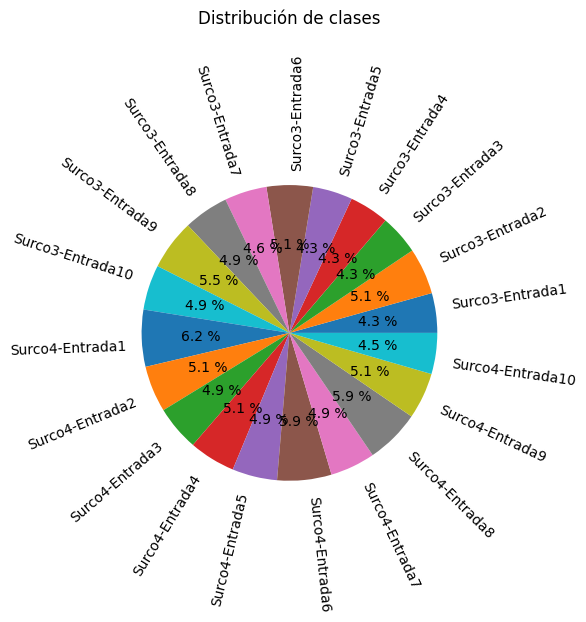

In [24]:
import matplotlib.pyplot as plt
distribucion = datos.groupby('90000').size()
etiquetas = ['Surco3-Entrada1', 'Surco3-Entrada2', 'Surco3-Entrada3',
             'Surco3-Entrada4', 'Surco3-Entrada5', 'Surco3-Entrada6',
             'Surco3-Entrada7', 'Surco3-Entrada8', 'Surco3-Entrada9',
             'Surco3-Entrada10', 'Surco4-Entrada1', 'Surco4-Entrada2',
             'Surco4-Entrada3', 'Surco4-Entrada4', 'Surco4-Entrada5',
             'Surco4-Entrada6', 'Surco4-Entrada7', 'Surco4-Entrada8',
             'Surco4-Entrada9', 'Surco4-Entrada10']
plt.pie(distribucion, labels=etiquetas, autopct="%0.1f %%", rotatelabels=True)
plt.title("Distribución de clases", loc="center", pad=90)
plt.show()

**Visualizar algunos datos aleatoriamente**

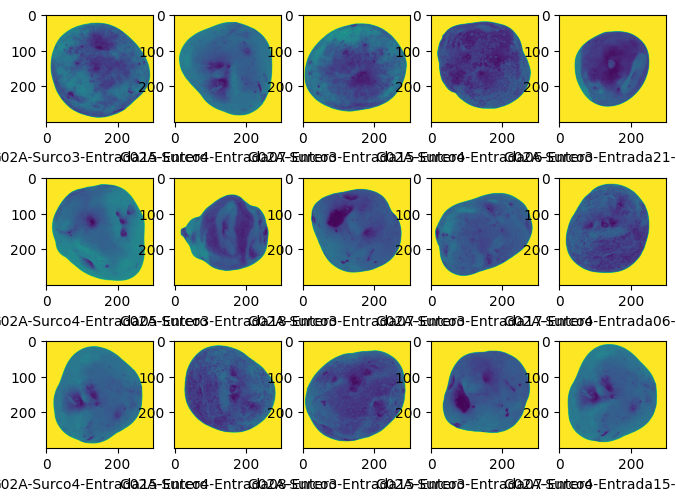

In [38]:
ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 5, figsize = (8, 6))
for k in range(3):
  for j in range(5):
    azar = random.sample(range(ran),1)
    img = np.array(X.iloc[azar].values)
    img = np.array(img).reshape(300, 300)
    ax[k, j].imshow(img)
    ax[k, j].set_xlabel(y[azar[0]])

plt.show()

**Separamos los pixeles y la categoria**

In [37]:
X = datos.drop(['90000'],axis = 1)
y = datos['90000']

#3. Experimentos realizados

##3.1 **K-Nearest Neighbors**

### a. Método de clasificación: : **K-Nearest Neighbors**

###b. Código del experimento

**Separacion de datos de training y test**



In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=4)

**Entrenamiento y test**

In [49]:
def Exactitud_KNN(k):
  #Definicion de modelo
  model = KNeighborsClassifier(n_neighbors=k)
  #Entrenamiento del modelo
  model.fit(X_train, y_train)
  #Test del modelo
  Exactitud = model.score(X_test, y_test)
  return Exactitud

**Buscamos la mejor exactitud global de varios K**

In [53]:
# Iniciamos los K que se probaran
lista_k = [k for k in range(3, 21, 2)]
lista_Exactitud = []

# De los K buscamos el mejor
for K in lista_k:
  lista_Exactitud.append(Exactitud_KNN(K))

# Mostramos los entrenamientos
print("K \t Exactitud")
for i in range(len(lista_k)):
  print(lista_k[i],"\t",lista_Exactitud[i])

K 	 Exactitud
3 	 0.47596153846153844
5 	 0.4855769230769231
7 	 0.49038461538461536
9 	 0.47596153846153844
11 	 0.47596153846153844
13 	 0.44711538461538464
15 	 0.44711538461538464
17 	 0.42788461538461536
19 	 0.42788461538461536


**Asignamos el mejor K al modelo**

In [56]:
# Obtenemos la mejor exactitud
k = lista_k[lista_Exactitud.index(max(lista_Exactitud))]
# Definicion de modelo
model = KNeighborsClassifier(n_neighbors=k)
# Entrenamiento del modelo
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

###c. Analisis e Interpretacion de la Matriz de confusión

In [58]:
#Test del modelo
pred = model.predict(X_test)
#Matriz confusion
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 5  0  2  1  0  1  0  0  0  0  0  1  0  2  0  2  1  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  4  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  3  1  1  0  0  0  0  0  2  0  1  1  1  0  1  0  0]
 [ 1  0  0  2  1  0  0  0  0  0  0  0  0  1  0  0  0  1  1  0]
 [ 2  0  2  2  1  2  1  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 1  0  5  0  0  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  6  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  1  0  0  3  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  0  0  6  0  5  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  2  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  7  0  0  0  0  2  0]
 [ 0  0  3  0  0  0  2  0  0  0  0  0  2  0  5  0  0  1  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  5  0  4

**Mapa de calor de la matriz de confusion**

<Axes: >

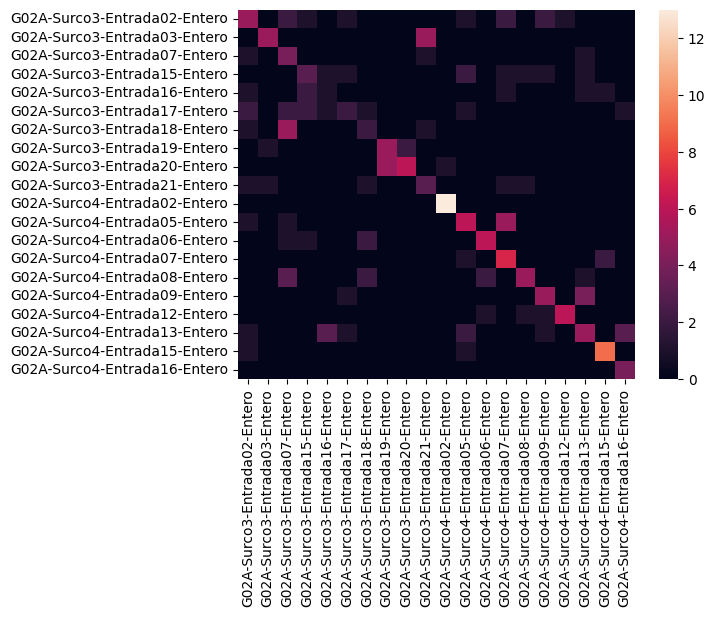

In [99]:
etiquetas = datos.groupby('90000').groups.keys()
sns.heatmap(matriz, yticklabels=etiquetas, xticklabels=etiquetas)

**Segun el mapa de calor mostramos las papas que tiene mas confusiones:**

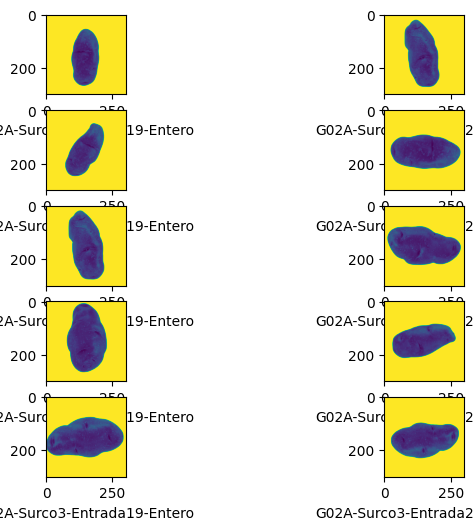

In [102]:
#papa S3E19 con S3E20
# Obtener los índices donde la columna coincide con "S3E2"
i_S3E02 = y[y == 'G02A-Surco3-Entrada19-Entero'].index.tolist()
i_S3E10 = y[y == 'G02A-Surco3-Entrada20-Entero'].index.tolist()

fig, ax = plt.subplots(5, 2, figsize = (8, 6))
for k in range(5):
  for j in range(2):
    if(j==0):
      azar = random.randint(min(i_S3E02), max(i_S3E02))
    if(j==1):
      azar = random.randint(min(i_S3E10), max(i_S3E10))

    img = np.array(X.iloc[azar].values)
    img = np.array(img).reshape(300, 300)
    ax[k, j].imshow(img)
    ax[k, j].set_xlabel(y[azar])

plt.show()

**Interpretacion:**

* Lo podemos apreciar en el mapa de calor que existen algunas variedades que se predice incorrectamente esto ocurre ya que existe algunas papas que son parecidas en su forma exterior
* Se obserta que el surco3 entrada19 tien la misma forma de papa que el surco3 entrada20
* En general, cuanto más grande es el valor en la diagonal principal, mejor es nuestro rendimiento de clasificación del modelo para esa clase en particular asi lo podemos apreciar en el mapa de calor.

###d. Tabla resumen del experimento

In [105]:
#Calculo de las metricas
reporte = classification_report(y_test, pred)
#Mostrar las metricas
print('Metricas de evaluacion')
print(reporte)

Metricas de evaluacion
                              precision    recall  f1-score   support

G02A-Surco3-Entrada02-Entero       0.36      0.33      0.34        15
G02A-Surco3-Entrada03-Entero       0.71      0.50      0.59        10
G02A-Surco3-Entrada07-Entero       0.22      0.57      0.32         7
G02A-Surco3-Entrada15-Entero       0.33      0.27      0.30        11
G02A-Surco3-Entrada16-Entero       0.17      0.14      0.15         7
G02A-Surco3-Entrada17-Entero       0.33      0.17      0.22        12
G02A-Surco3-Entrada18-Entero       0.25      0.22      0.24         9
G02A-Surco3-Entrada19-Entero       0.50      0.62      0.56         8
G02A-Surco3-Entrada20-Entero       0.75      0.50      0.60        12
G02A-Surco3-Entrada21-Entero       0.30      0.38      0.33         8
G02A-Surco4-Entrada02-Entero       0.93      1.00      0.96        13
G02A-Surco4-Entrada05-Entero       0.43      0.46      0.44        13
G02A-Surco4-Entrada06-Entero       0.67      0.60      0.63       

##3.2 **NAIVE BAYES**

###a. Método de clasificación: NAIVE BAYES

###b. Código del experimento

**Entrenamiento del Naive Bayes**

In [134]:
def Exactitud_Bayes(S):
  # Separar entrenamiento y test
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3 ,random_state=S)
  # Crear objeto NaiveBayes
  NaiveBayes = GaussianNB()
  # Entrenamientos
  NaiveBayes.fit(X_train,y_train)
  # Exactitud del entrenamiento
  return NaiveBayes.score(X_test,y_test)

**Busqueda del mejor hiperparametro (semilla) para la separación de datos, para entrenamiento y test**

In [136]:
# Iniciamos las semillas que se probaran
n = 32
semillas_primos = [x for x in range(2, n+1) if all(x % d != 0 for d in range(2, int(x**0.5)+1))]
lista_Exactitud = []

# De las semillas buscamos el mejor
for S in semillas_primos:
  lista_Exactitud.append(Exactitud_Bayes(S))

# Mostramos los entrenamientos
print("Semilla \t Exactitud")
for i in range(len(lista_k)):
  print(semillas_primos[i],"\t",lista_Exactitud[i])

Semilla 	 Exactitud
2 	 0.20454545454545456
3 	 0.2190082644628099
5 	 0.19834710743801653
7 	 0.26859504132231404
11 	 0.2128099173553719
13 	 0.2768595041322314
17 	 0.1652892561983471
19 	 0.21694214876033058
23 	 0.19008264462809918


**Instanciamos el modelo con la mejor semilla**

In [138]:
# Obtenemos la mejor exactitud
S = semillas_primos[lista_Exactitud.index(max(lista_Exactitud))]
# Separar entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3 ,random_state=S)
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()
# Entrenamientos
NaiveBayes.fit(X_train,y_train)

GaussianNB()

###c. Analisis e Interpretación de la Matriz de confusión

In [ ]:
# Crear una lista de tuplas con los valores de y test e pred
resultados = list(zip(y_test, pred))
# Crear el DataFrame a partir de la lista de tuplas
df = pd.DataFrame(resultados, columns=[ 'y_test', 'pred'])

# Generar la matriz de confusión
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)

print('Matriz de Confusión')
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 3 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 1 0 1]
 [0 0 2 1 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
Exactitud =  0.2857142857142857


<Axes: >

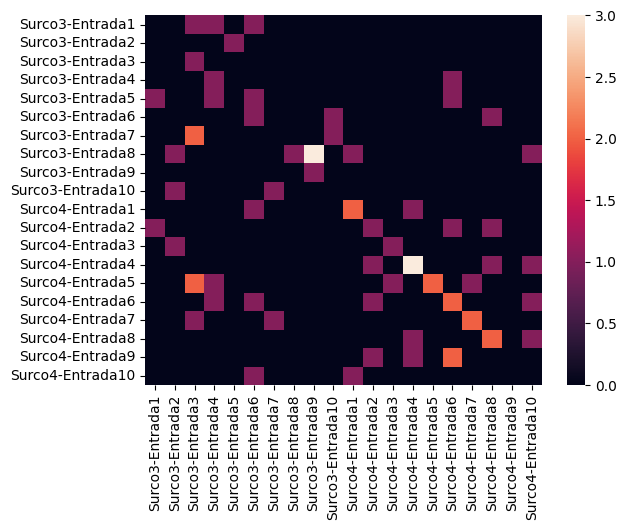

In [ ]:
categorias = ['Surco3-Entrada1', 'Surco3-Entrada2', 'Surco3-Entrada3',
             'Surco3-Entrada4', 'Surco3-Entrada5', 'Surco3-Entrada6',
             'Surco3-Entrada7', 'Surco3-Entrada8', 'Surco3-Entrada9',
             'Surco3-Entrada10', 'Surco4-Entrada1', 'Surco4-Entrada2',
             'Surco4-Entrada3', 'Surco4-Entrada4', 'Surco4-Entrada5',
             'Surco4-Entrada6', 'Surco4-Entrada7', 'Surco4-Entrada8',
             'Surco4-Entrada9', 'Surco4-Entrada10']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias)

**Interpretación**: La matriz de confusión muestra los resultados de un modelo de clasificación que fue evaluado con un conjunto de datos. Cada fila representa la clase verdadera de las muestras y cada columna representa la clase predicha por el modelo. Los números en la matriz indican la cantidad de muestras que se clasificaron en cada combinación de clase verdadera y clase predicha.

En este caso, la matriz de confusión indica que el modelo tuvo una exactitud de aproximadamente 0.2857, lo que significa que acertó en alrededor del 28.57% de las muestras evaluadas. Los valores individuales en la matriz muestran la distribución de las clasificaciones del modelo en cada clase.

###d. Tabla resumen del experimento


In [ ]:
from sklearn.metrics import classification_report

#Calculo de las metricas
reporte = classification_report(y_test, pred)

#Mostrar las metricas
print('Metricas de evaluacion')
print(reporte)

Metricas de evaluacion
                              precision    recall  f1-score   support

G02A-Surco3-Entrada02-Entero       0.00      0.00      0.00         3
G02A-Surco3-Entrada03-Entero       0.00      0.00      0.00         1
G02A-Surco3-Entrada07-Entero       0.14      1.00      0.25         1
G02A-Surco3-Entrada15-Entero       0.20      0.50      0.29         2
G02A-Surco3-Entrada16-Entero       0.00      0.00      0.00         4
G02A-Surco3-Entrada17-Entero       0.17      0.33      0.22         3
G02A-Surco3-Entrada18-Entero       0.00      0.00      0.00         3
G02A-Surco3-Entrada19-Entero       1.00      0.14      0.25         7
G02A-Surco3-Entrada20-Entero       0.25      1.00      0.40         1
G02A-Surco3-Entrada21-Entero       0.00      0.00      0.00         2
G02A-Surco4-Entrada02-Entero       0.50      0.50      0.50         4
G02A-Surco4-Entrada05-Entero       0.25      0.25      0.25         4
G02A-Surco4-Entrada06-Entero       0.50      0.50      0.50       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##3.3 **ARBOLES DE DECISION**

###a. Método de clasificación: ARBOLES DE DECISION

###b. Código del experimento

**Librerias a utilizar**

In [ ]:
# Librerías generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

# Librerías para métricas
import sklearn.metrics as metrics

# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier

**Leer Datos**

In [ ]:
# Leer datos
datos = pd.read_csv("enteros.csv",sep=",")

**Eliminar primera columna**

In [ ]:
# Eliminar la primera columna de ID
datos = datos.drop(["Unnamed: 0"],axis=1)

**Separación de datos, para entrenamiento y test**

In [ ]:
# Separación de datos, para entrenamiento y test
X = datos.drop(["90000"],axis=1)
y = datos["90000"]

# Separar entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5)

**Entrenamiento del árbol de decisión**

In [ ]:
# Crear el obj árbol de decisión
# HIPERPARAMETROS
#================
# Entropía: (criterion)
# Máxima profundiad del árbol:  (max_depth)
ArbolDecision= DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Entrenar arbol de decision
ArbolDecision.fit(X_train,y_train)

# Test AD
ArbolDecision.score(X_test,y_test)

0.2543352601156069

**Gráfica del árbol de decisión**

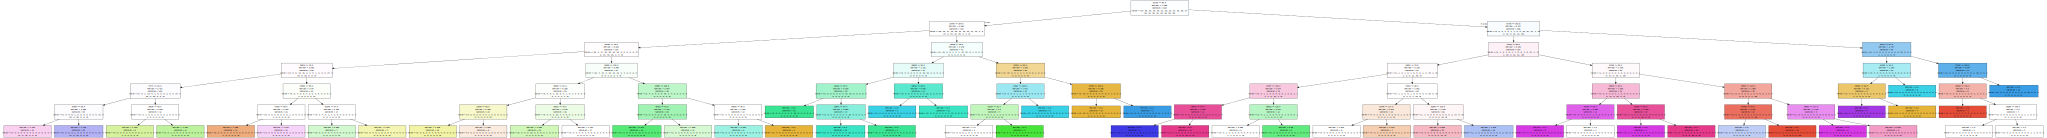

In [ ]:
from graphviz.sources import Source
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(ArbolDecision, feature_names=X.columns, filled=True))
SVG(graph.pipe(format="svg"))


###c. Analisis e Interpretacion de la Matriz de confusión

In [ ]:
pred =ArbolDecision.predict(X_test)
MatrizConfusion = confusion_matrix(y_test, pred)
Exactitud = metrics.accuracy_score(y_test, pred)
print("Matriz de Confusión")
print(MatrizConfusion)
print('Exactitud = ', Exactitud)

Matriz de Confusión
[[1 0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 2 0 1 0 2 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [4 0 2 2 0 0 0 0 0 0 0 0 3 0 0 0 2 0 1 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [2 0 2 0 2 1 0 0 0 0 0 0 3 0 0 3 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 4 5 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 6 2 0 1 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 1 0 4 0 0 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2]
 [1 0 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 5 0 0 0 1 0 3 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 4 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 5 0 3 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 0]
 [3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 1 0]
 [0 0 2 0 1 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3]]
Exactitud =  0.2543352601156069


<Axes: >

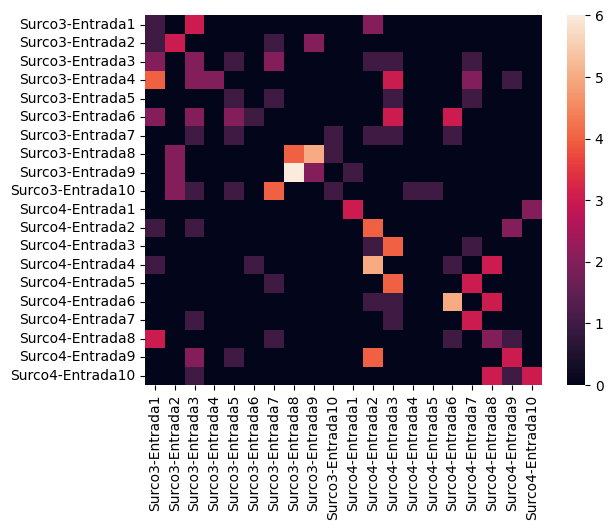

In [ ]:
categorias = ['Surco3-Entrada1', 'Surco3-Entrada2', 'Surco3-Entrada3',
             'Surco3-Entrada4', 'Surco3-Entrada5', 'Surco3-Entrada6',
             'Surco3-Entrada7', 'Surco3-Entrada8', 'Surco3-Entrada9',
             'Surco3-Entrada10', 'Surco4-Entrada1', 'Surco4-Entrada2',
             'Surco4-Entrada3', 'Surco4-Entrada4', 'Surco4-Entrada5',
             'Surco4-Entrada6', 'Surco4-Entrada7', 'Surco4-Entrada8',
             'Surco4-Entrada9', 'Surco4-Entrada10']
sns.heatmap(MatrizConfusion, yticklabels=categorias, xticklabels=categorias)

**Interpretación:** La matriz de confusión muestra los resultados de un modelo de clasificación que fue evaluado con un conjunto de datos. Cada fila representa la clase verdadera de las muestras y cada columna representa la clase predicha por el modelo. Los números en la matriz indican la cantidad de muestras que se clasificaron en cada combinación de clase verdadera y clase predicha.

En este caso, la matriz de confusión indica que el modelo tuvo una exactitud de aproximadamente 0.2775, lo que significa que acertó en alrededor del 27.75% de las muestras evaluadas. Los valores individuales en la matriz muestran la distribución de las clasificaciones del modelo en cada clase.

###d. Tabla resumen del experimento

In [ ]:
from sklearn.metrics import classification_report

#Calculo de las metricas
reporte = classification_report(y_test, pred)

#Mostrar las metricas
print('Metricas de evaluacion')
print(reporte)

Metricas de evaluacion
                              precision    recall  f1-score   support

G02A-Surco3-Entrada02-Entero       0.07      0.17      0.10         6
G02A-Surco3-Entrada03-Entero       0.33      0.43      0.38         7
G02A-Surco3-Entrada07-Entero       0.12      0.20      0.15        10
G02A-Surco3-Entrada15-Entero       1.00      0.14      0.25        14
G02A-Surco3-Entrada16-Entero       0.14      0.25      0.18         4
G02A-Surco3-Entrada17-Entero       0.50      0.08      0.13        13
G02A-Surco3-Entrada18-Entero       0.00      0.00      0.00         6
G02A-Surco3-Entrada19-Entero       0.40      0.33      0.36        12
G02A-Surco3-Entrada20-Entero       0.22      0.18      0.20        11
G02A-Surco3-Entrada21-Entero       0.33      0.09      0.14        11
G02A-Surco4-Entrada02-Entero       0.75      0.60      0.67         5
G02A-Surco4-Entrada05-Entero       0.21      0.50      0.30         8
G02A-Surco4-Entrada06-Entero       0.21      0.67      0.32       

##3.4 **PERCEPTRON(RNA)**

###a. Método de clasificación: PERCEPTRON(RNA)

###b. Código del experimento

**Cargado de los datos**

In [ ]:
#Librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Primera forma de lectura desde el drive
# Cargamos el dataset
import pandas as pd
datos = pd.read_csv("/content/drive/MyDrive/MachineLearning/Proyecto/Archivo_CSV/Enteros/enteros.csv", sep=",", header=0)
datos.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,90000
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero
4,4,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,G02A-Surco3-Entrada16-Entero


In [ ]:
datos = pd.read_csv("enteros.csv", sep=",", header=0)
# Eliminar la columna de indices
datos = datos.drop(datos.columns[0], axis=1)
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,90000
0,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,G02A-Surco3-Entrada16-Entero
1,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,G02A-Surco3-Entrada16-Entero
2,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,G02A-Surco3-Entrada16-Entero
3,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,G02A-Surco3-Entrada16-Entero
4,255,255,255,255,255,255,255,255,255,255,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,G02A-Surco3-Entrada16-Entero


**Agregar las librerias necesarias**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

**Visualizar algunos datos aleatoriamente**

In [ ]:
# Eliminar la columna de indices
datos = datos.drop(datos.columns[0], axis=1)

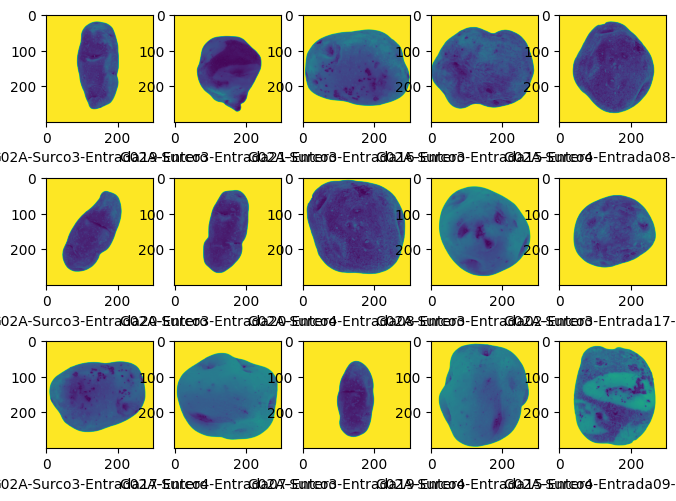

In [ ]:
#Visualizar algunos datos aleatoriamente
X = datos.drop(['90000'],axis = 1)
y = datos['90000']

ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 5, figsize = (8, 6))
for k in range(3):
  for j in range(5):
    azar = random.sample(range(ran), 1)
    img = np.array(X.iloc[azar].values)
    img = np.array(img).reshape(300, 300)
    ax[k, j].imshow(img)
    ax[k, j].set_xlabel(y[azar[0]])

plt.show()

**Modelando los datos**

In [ ]:
# Codificar las etiquetas test
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(datos["90000"])
datos["90000"] = pd.DataFrame(y, columns=['Columna'])
datos.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,90000
111,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,6
110,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,6
198,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
267,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,5
669,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,8


**Separacion de datos para Training y test**

In [ ]:
# Separa datos para entrenamiento y test
def Separacion(datos, porcentaje_test=0.25):
    dat_test = datos.sample(frac=porcentaje_test)
    dat_train = datos.drop(dat_test.index)
    return dat_train, dat_test

In [ ]:
train,test = Separacion(datos, 0.3)

**Entrenamiento y test**

In [ ]:
# Dividir los atributos y las etiquetas para ENTRENO
X_train = train.drop(["90000"],axis=1)
y_train = train["90000"]

In [ ]:
# Dividir los atributos y las etiquetas para TEST
X_test = test.drop(["90000"],axis=1)
y_test = test["90000"]

**Normalizando entrenamiento y test**

In [ ]:
X_train = X_train/255
X_test = X_test/255

**Convertimos de la clase salida**

In [ ]:
# Codificar las etiquetas train
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train = pd.DataFrame(y_train, columns=['Columna'])

In [ ]:
# Codificar las etiquetas test
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
y_test = pd.DataFrame(y_test, columns=['Columna'])

**Instanciamos el modelo**

In [ ]:
# Crear el modelo
model = Sequential()

# Agregar la capa de salida con 20 salidas
model.add(Dense(20, activation='softmax', input_shape=(90000,)))

In [ ]:
# Compilar el modelo
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y obtener el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, validation_data=(X_test, y_test))

Epoch 1/20
16/16 [==============================] - 2s 113ms/step - loss: 127.0354 - accuracy: 0.0702 - val_loss: 198.9110 - val_accuracy: 0.0435
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 164.9992 - accuracy: 0.0806 - val_loss: 79.9076 - val_accuracy: 0.1353
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 59.6089 - accuracy: 0.1322 - val_loss: 38.5189 - val_accuracy: 0.1449
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 25.4376 - accuracy: 0.1901 - val_loss: 23.3105 - val_accuracy: 0.1546
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 16.3657 - accuracy: 0.3202 - val_loss: 14.5480 - val_accuracy: 0.1787
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 11.2319 - accuracy: 0.3368 - val_loss: 14.6027 - val_accuracy: 0.2222
Epoch 7/20
16/16 [==============================] - 1s 41ms/step - loss: 11.6696 - accuracy: 0.3740 - val_loss: 13.1464 - val_accuracy: 0.

###c. Analisis e Interpretacion de la Matriz de confusión

In [ ]:
# Obtener las métricas del historial
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Imprimir las métricas
print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_accuracy)

Train Loss: [127.03543090820312, 164.99916076660156, 59.60893249511719, 25.43755340576172, 16.365690231323242, 11.231919288635254, 11.669574737548828, 7.6241068840026855, 6.306942462921143, 5.837534427642822, 5.409728050231934, 4.62172794342041, 2.7132396697998047, 3.7020456790924072, 4.468797206878662, 3.622018575668335, 3.3191752433776855, 4.633702754974365, 6.253189563751221, 4.041122913360596]
Train Accuracy: [0.07024793326854706, 0.08057851344347, 0.13223139941692352, 0.1900826394557953, 0.32024794816970825, 0.33677685260772705, 0.37396693229675293, 0.4545454680919647, 0.49793389439582825, 0.4834710657596588, 0.5185950398445129, 0.5268595218658447, 0.6611570119857788, 0.5971074104309082, 0.5826446413993835, 0.6115702390670776, 0.6219007968902588, 0.5888429880142212, 0.56611567735672, 0.6136363744735718]
Validation Loss: [198.91102600097656, 79.90763092041016, 38.51888656616211, 23.31047821044922, 14.547974586486816, 14.6027193069458, 13.146410942077637, 8.869539260864258, 10.60976

##d. Tabla resumen del experimento

In [ ]:
print("Variedad \t trainloss \t train accurracy \t PerdidaValidacion \t PrecisionValidacion")
papas_tipo = datos['90000'].unique()
for i in range(20):
  print(papas_tipo[i],"\t \t",i,train_loss[i],'\t',train_accuracy[i],'\t',val_loss[i],'\t',val_accuracy[i])

Variedad 	 trainloss 	 train accurracy 	 PerdidaValidacion 	 PrecisionValidacion
4 	 	 0 127.03543090820312 	 0.07024793326854706 	 198.91102600097656 	 0.043478261679410934
19 	 	 1 164.99916076660156 	 0.08057851344347 	 79.90763092041016 	 0.13526569306850433
0 	 	 2 59.60893249511719 	 0.13223139941692352 	 38.51888656616211 	 0.14492753148078918
6 	 	 3 25.43755340576172 	 0.1900826394557953 	 23.31047821044922 	 0.15458936989307404
7 	 	 4 16.365690231323242 	 0.32024794816970825 	 14.547974586486816 	 0.17874395847320557
17 	 	 5 11.231919288635254 	 0.33677685260772705 	 14.6027193069458 	 0.2222222238779068
11 	 	 6 11.669574737548828 	 0.37396693229675293 	 13.146410942077637 	 0.260869562625885
12 	 	 7 7.6241068840026855 	 0.4545454680919647 	 8.869539260864258 	 0.2946859896183014
5 	 	 8 6.306942462921143 	 0.49793389439582825 	 10.60976505279541 	 0.20772947371006012
2 	 	 9 5.837534427642822 	 0.4834710657596588 	 9.481954574584961 	 0.2801932394504547
3 	 	 10 5.409728

##3.5 **MULTI-LAYER PERCEPTRON(MLP)**

###a. Método de clasificación: MULTI-LAYER PERCEPTRON(PML)

###b. Código del experimento

**Librerias a utilizar**

In [ ]:
# Librerías generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
# Librerías para métricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Perceptrón multicapa para clasificación
from sklearn.neural_network import MLPClassifier

**Leer Datos**

In [ ]:
datos = pd.read_csv('enteros.csv', delimiter=',',header=0)

**Eliminar primera columna**

In [ ]:
# Eliminar la columna de indices
datos = datos.drop(datos.columns[0], axis=1)

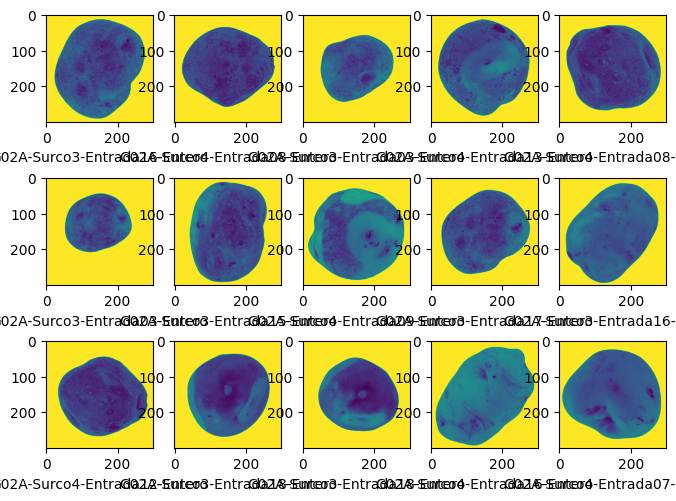

In [ ]:
XX = datos.drop(['90000'], axis=1)
yy = datos['90000']

# obtenemos la cantidad de datos, para luego seleccionar aleatoriamente
cant_datos = datos.shape[0]-1
fig, ax = plt.subplots(3, 5, figsize=(8,6))
for k in range(3):
  for j in range(5):
    azar = random.sample(range(cant_datos),1)
    img = np.array(XX.iloc[azar].values)
    img = np.array(img).reshape(300, 300)
    ax[k,j].imshow(img)
    ax[k,j].set_xlabel(yy[azar[0]])
plt.show()

**Distribución de clases**

In [ ]:
print('Dimensionalidad = ', datos.shape)

print(datos.groupby('90000').size())

Dimensionalidad =  (691, 90001)
90000
G02A-Surco3-Entrada02-Entero    30
G02A-Surco3-Entrada03-Entero    35
G02A-Surco3-Entrada07-Entero    30
G02A-Surco3-Entrada15-Entero    30
G02A-Surco3-Entrada16-Entero    30
G02A-Surco3-Entrada17-Entero    35
G02A-Surco3-Entrada18-Entero    32
G02A-Surco3-Entrada19-Entero    34
G02A-Surco3-Entrada20-Entero    38
G02A-Surco3-Entrada21-Entero    34
G02A-Surco4-Entrada02-Entero    43
G02A-Surco4-Entrada05-Entero    35
G02A-Surco4-Entrada06-Entero    34
G02A-Surco4-Entrada07-Entero    35
G02A-Surco4-Entrada08-Entero    34
G02A-Surco4-Entrada09-Entero    41
G02A-Surco4-Entrada12-Entero    34
G02A-Surco4-Entrada13-Entero    41
G02A-Surco4-Entrada15-Entero    35
G02A-Surco4-Entrada16-Entero    31
dtype: int64


**Separación de datos y normalización**

In [ ]:
X = datos.drop(['90000'], axis=1)
y = datos['90000']
# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size=0.3)

**Entrenamiento del MLP**

In [ ]:
# diseño de MLP
RNA = MLPClassifier(hidden_layer_sizes=(1000,500,250,125,20),
alpha=0.01,activation='relu', max_iter=100)
# Entrenamiento de RNA
RNA.fit(X_train, y_train)

RNA.score(X_test,y_test)

0.052884615384615384

###c. Analisis e Interpretacion de la Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
pred = RNA.predict(X_test)
matriz = confusion_matrix(y_test, pred)
print(matriz)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
print(accuracy)

[[ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0

###d. Tabla resumen del experimento

In [ ]:
from sklearn.metrics import classification_report

#Calculo de las metricas
reporte = classification_report(y_test, pred)

#Mostrar las metricas
print('Metricas de evaluacion')
print(reporte)

Metricas de evaluacion
                              precision    recall  f1-score   support

G02A-Surco3-Entrada02-Entero       0.00      0.00      0.00        12
G02A-Surco3-Entrada03-Entero       0.00      0.00      0.00         7
G02A-Surco3-Entrada07-Entero       0.00      0.00      0.00         7
G02A-Surco3-Entrada15-Entero       0.05      1.00      0.10        11
G02A-Surco3-Entrada16-Entero       0.00      0.00      0.00        10
G02A-Surco3-Entrada17-Entero       0.00      0.00      0.00        11
G02A-Surco3-Entrada18-Entero       0.00      0.00      0.00         6
G02A-Surco3-Entrada19-Entero       0.00      0.00      0.00         6
G02A-Surco3-Entrada20-Entero       0.00      0.00      0.00        14
G02A-Surco3-Entrada21-Entero       0.00      0.00      0.00         6
G02A-Surco4-Entrada02-Entero       0.00      0.00      0.00        16
G02A-Surco4-Entrada05-Entero       0.00      0.00      0.00         9
G02A-Surco4-Entrada06-Entero       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#4.Tabla comparativa, resumen de las mejores versiones de cada clasificador

A continucion se tiene la tabla comparativa de los 5 clasificadores:

In [ ]:
import pandas as pd

data = {
    'Clasificador': ['K-NN (k = 3)', 'Naive Bayes', 'Decision Tree Classifier', 'RNA','Multi-Layer Perceptron'],
    'Exactitud': [0.4856, 0.2857, 0.2543, 0.6136, 0.0529]
}

df = pd.DataFrame(data)
df['Exactitud (%)'] = (df['Exactitud'] * 100).round(2)

df

,Clasificador,Exactitud,Exactitud (%)
0,K-NN (k = 3),0.4856,48.56
1,Naive Bayes,0.2857,28.57
2,Decision Tree Classifier,0.2543,25.43
3,RNA,0.6136,61.36
4,Multi-Layer Perceptron,0.0529,5.29


* En la tabla anterior, los valores de precisión representan el rendimiento de cada clasificador. El clasificador RNA logro la mayor precision en la etapa 20, con una precision de 0.6136, lo que lo convierte en la mejor versión entre los clasificadores dados, esta seguida del clasificador K-NN con k = 3 logró la mayor precisión de 0,4856. El clasificador Naive Bayes logró una precisión de 0,2857, seguido por el Clasificador de Árbol de Decisión con una precisión de 0,2543, y como unos de los penultimo clasificador Decision Tree Classifier, esta con una precision de 0.2543. El clasificador de perceptrón multicapa (MLP) fue el que menos eficacia tuvo, con una precisión de 0,0529, este ultimo considerado como el peor clasificador para este dataset en especifico.

#5. Conclusiones preliminares de la etapa de experimentación.

A modo de resumen las conclusiones extraídas del análisis de los resultados de precisión de los clasificadores evaluados:

* El algoritmo de ARN exhibió la precisión más alta con un 61,36 %, lo que indica su superioridad sobre los demás algoritmos. Esto sugiere que el modelo basado en ARN es adecuado para la tarea de clasificación en cuestión.

* Siguiendo de cerca, el algoritmo KNN logró una precisión respetable del 48,56%. Aunque no alcanza el rendimiento del algoritmo de ARN, todavía demuestra capacidades confiables de clasificación y clasificación.

* Por el contrario, el algoritmo Naive Bayes funcionó con una precisión inferior al 28,57 %. Si bien supera la probabilidad aleatoria, parece menos efectivo en comparación con los otros algoritmos evaluados.

* A continuación, el clasificador de árboles de decisión logró un porcentaje de precisión del 25,43%, ubicándose en el cuarto lugar en desempeño. Esto indica que el modelo basado en el árbol de decisión puede ser relativamente menos efectivo en el manejo de tareas de clasificación para este conjunto de datos en particular.

* Por último, el perceptrón multicapa (MLP) presenta una precisión notablemente baja del 5,29%. Este resultado podría atribuirse a limitaciones de hardware o recursos informáticos inadecuados en el entorno de Colab, como RAM insuficiente. En consecuencia, se recomienda considerar estas restricciones como factores potenciales que afectan la precisión del MLP.

En conclusión, el algoritmo RNA demostró la mayor precisión, seguido del algoritmo KNN, Naive Bayes y el clasificador de árboles de decisión. La poca precisión del MLP sugiere limitaciones de hardware o recursos computacionales insuficientes.
